In [1]:
from forse.tools.ps_tools import *
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

In [2]:
def make_power_law_spectrum(A80=800, alpha=-2.5, lmax=1024):
    ell = np.arange(lmax+1)
    cl = (A80/80.)*ell**alpha
    cl[0] = 0
    return cl
def make_map(cl, nside=1024):
    m = hp.synfast(cl, nside, new=True)
    return m

In [3]:
ClTT = make_power_law_spectrum()
ClEE = make_power_law_spectrum(A80=80)
ClBB = ClEE/2.
cl = np.array([ClTT, ClEE, ClBB, ClTT*0., ClTT*0., ClTT*0.])
m = make_map(cl)

/usr/common/software/tensorflow/intel-tensorflow/1.13.1-py36/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/global/homes/k/krach/usr/python_prefix/lib/python3.6/site-packages/healpy/projaxes.py:1194: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/global/homes/k/krach/usr/python_prefix/lib/python3.6/site-packages/healpy/projaxes.py:1153: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):


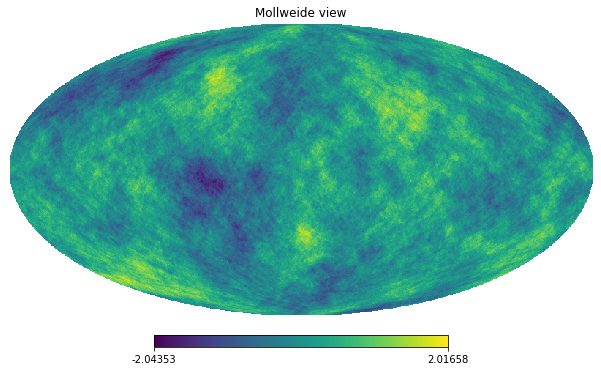

In [4]:
hp.mollview(m[2])

In [5]:
msmooth = hp.smoothing(m, fwhm=np.radians(1.))

Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [6]:
cl_map_smooth = hp.anafast(msmooth)
cl_map = hp.anafast(m)

In [24]:
ell = np.arange(len(cl_map[0]))
dl_map = cl_map*ell*(ell+1)/2./np.pi

(2, 500)

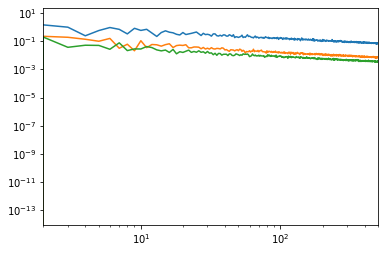

In [25]:
plt.loglog(dl_map[0])
plt.loglog(dl_map[1])
plt.loglog(dl_map[2])
plt.xlim(2, 500)

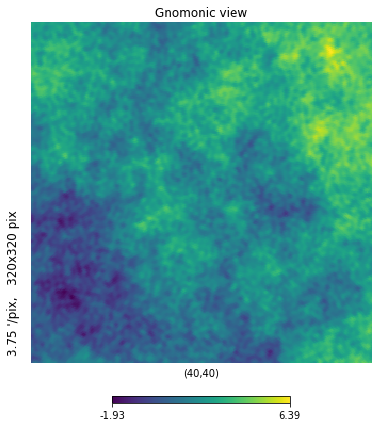

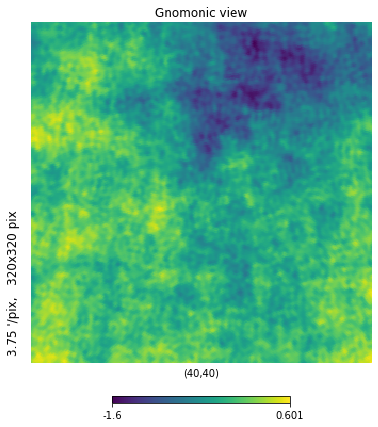

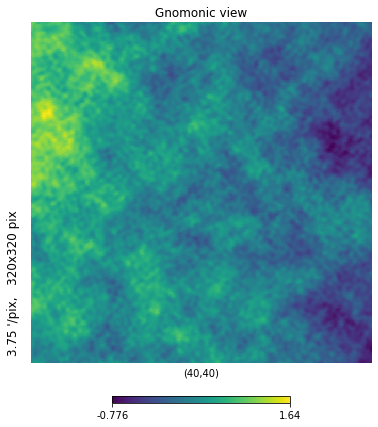

In [26]:
Tmap = hp.gnomview(m[0], reso=3.75, xsize=320, rot=[40, 40], return_projected_map=True)
Qmap = hp.gnomview(m[1], reso=3.75, xsize=320, rot=[40, 40], return_projected_map=True)
Umap = hp.gnomview(m[2], reso=3.75, xsize=320, rot=[40, 40], return_projected_map=True)

In [27]:
Tmap = np.flip(Tmap, axis=0)
Qmap = np.flip(Qmap, axis=0)
Umap = np.flip(Umap, axis=0)

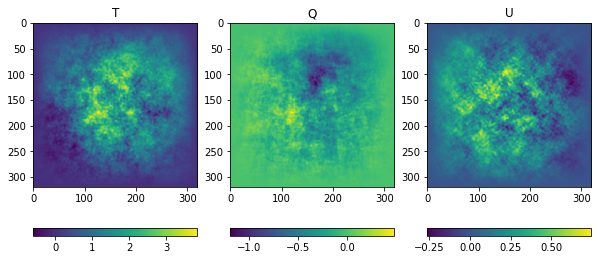

In [28]:
N=320 #number of pixels
pix_size  = 3.75 # size of a pixel in arcminutes
fsky = (N*np.deg2rad(pix_size/60.) )**2/4./np.pi 
X_width = N*pix_size/60.# horizontal map width in degrees
Y_width = N*pix_size/60.# vertical map width in degrees
window = (cosine_window(N))
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.title('T')
plt.imshow(Tmap*window); plt.colorbar(orientation='horizontal') 
plt.subplot(132)
plt.title('Q')
plt.imshow(Qmap*window); plt.colorbar(orientation='horizontal') 
plt.subplot(133)
plt.title('U')
plt.imshow(Umap*window); plt.colorbar(orientation='horizontal')

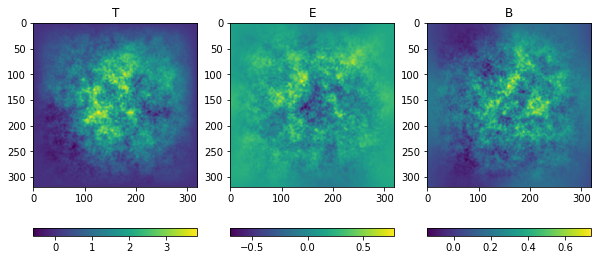

In [29]:
dwin_dx,dwin_dy,d2win_dx2,d2win_dy2,d2win_dxdy = kendric_method_precompute_window_derivitives(window,pix_size)

fTmap,fEmap,fBmap = kendrick_method_TQU_to_fourier_TEB(N,pix_size,
                                Tmap,Qmap,Umap,window,dwin_dx,dwin_dy,d2win_dx2,d2win_dy2,d2win_dxdy)

Emap = (np.real((np.fft.ifft2(np.fft.fftshift(fEmap)))))
Bmap = (np.real((np.fft.ifft2(np.fft.fftshift(fBmap)))))  
hTmap = (np.real((np.fft.ifft2(np.fft.fftshift(fTmap)))))   

plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.title('T')
plt.imshow(hTmap); plt.colorbar(orientation='horizontal') 
plt.subplot(132)
plt.title('E')
plt.imshow(Emap); plt.colorbar(orientation='horizontal') 
plt.subplot(133)
plt.title('B')
plt.imshow(Bmap  ); plt.colorbar(orientation='horizontal') 

In [30]:
delta_ell = 20.
ell_max = 800.

lb,clT = calculate_2d_spectrum(Map=hTmap, 
                                    delta_ell= delta_ell,ell_max=ell_max,
                                  pix_size=pix_size,N=N)
lb,clTE = calculate_2d_spectrum(Map=hTmap,Map2=Emap, 
                                    delta_ell= delta_ell,ell_max=ell_max,
                                  pix_size=pix_size,N=N)
lb,clTB = calculate_2d_spectrum(Map=hTmap,Map2=Bmap, 
                                    delta_ell= delta_ell,ell_max=ell_max,
                                  pix_size=pix_size,N=N)
lb,clEB = calculate_2d_spectrum(Map=Emap,Map2=Bmap, 
                                    delta_ell= delta_ell,ell_max=ell_max,
                                  pix_size=pix_size,N=N)
lb,clE = calculate_2d_spectrum(Emap,delta_ell,ell_max,pix_size,N)
lb,clB = calculate_2d_spectrum(Bmap,delta_ell,ell_max,pix_size,N)

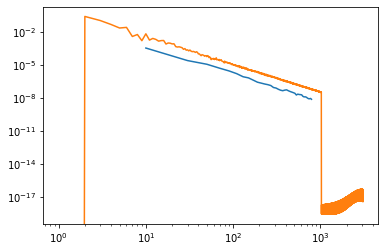

In [31]:
plt.loglog(lb, clE)
plt.loglog(cl_map[1])

/usr/common/software/tensorflow/intel-tensorflow/1.13.1-py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
No handles with labels found to put in legend.


(0, 500)

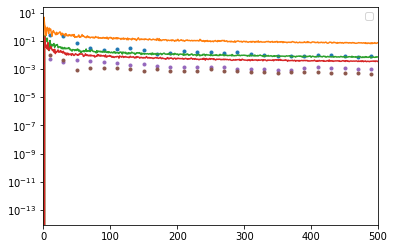

In [32]:
multiplicative_bias = (dl_map[0]/ell/(ell+1)*2*np.pi)[lb]/clT 
#this is a VERY rough estimate (should run MC signal-only sims)
plt.semilogy(lb, clT*lb*(lb+1.)/2./np.pi,'.')
plt.semilogy(ell, dl_map[0])
plt.semilogy(ell, dl_map[1])
plt.semilogy(ell, dl_map[2])

plt.semilogy(lb, clE*lb*(lb+1.)/2./np.pi, '.')
plt.semilogy(lb, clB*lb*(lb+1.)/2./np.pi, '.')
plt.legend() 
plt.xlim(0, 500)